## 0.3 Введение в интерактивные графики jupyter notebook

Jupyter предоставляет широкий диапазон динамических элементов, которые могут помочь при визуализации данных. В этом задании при подборе гиперпараметров для малых наборов данных Вы можете воспользоваться такими инструментами.

### Формат `.ipynb`. Вывод и рендеринг

Прежде всего нужно понять, каким образом в визуальном окружении происходит отображение вывода команд, выполненых внутри ячеек Jupyter Notebook. Рассмотрим пример исходного кода файла в формате `.ipynb`:
```json
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   ...Метаданные ячейки...
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Hi there\n"
     ]
    }
   ],
   "source": [
    "print('Hi there')"
   ]
  }
 ],
 ...Метаданные всего ноутбука...
}
    
```

Как видно из примера выше, каждая ячейка представляет из себя словарь с $2$ основными полями: `source` — текст в данной ячейке и `outputs` — список вывода данной ячейки. Вывод ячейки может иметь различный формат `output_type`, который определяет, как именно вывод ячейки будет отображаться после рендеринга. Однако, существует существенная проблема: **разные рендереры имеют разные возможности и семантики отображения `.ipynb`**. Таким образом, ноутбук, который правильно отображается при запуске локального Jupyter Notebook сервера может иметь другой вид при рендерненге внутри Kaggle/Google Colab/VSCode/GitHub/PyCharm.

Большинство сред корректно и одинакого отображают следующие виды вывода:
1. **Plain Text**, как результат вывода ячейки в stdout, stderr:

    ```python
    import sys

    print('Output to stdout')
    print('Output to stderr', file=sys.stderr)
    ```

    Список `outputs` будет содержать $2$ поля:
    ```json
    "outputs": [
      {
        "name": "stdout",
        "output_type": "stream",
        "text": [
          "Output to stdout\n"
        ]
      },
      {
        "name": "stderr",
        "output_type": "stream",
        "text": [
          "Output to stderr\n"
        ]
      }
    ]
    }
    ```
    
2. **Некоторые [MIME](https://developer.mozilla.org/ru/docs/Web/HTTP/Basics_of_HTTP/MIME_types) [типы](https://docs.w3cub.com/http/basics_of_http/mime_types/complete_list_of_mime_types.html)**, то есть стандартизованные типы документов в интернете. Обычно не возникает проблем с отрисовкой "статического" содержимого, такого как текст `text/plain`, html-код `text/html`, изображений `image/png`, `image/jpeg`, `image/svg+xml`. Ядро Jupyter ноутбука предоставляет как [явный способ](https://ipython.readthedocs.io/en/stable/config/integrating.html?highlight=_repr_pretty_#rich-display) записывать содержимое заданного MIME-типа в вывод ячейки, так и [набор классов-обёрток](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#module-IPython.display) для этого.

Рассмотрим несколько популярных вариантов как для явного, так и для неявного вывода:

In [ ]:
class PlainTextOutput:
    def __init__(self):
        pass

    def __repr__(self):
        return 'Данный текст будет встроен в вывод ячейки как text/plain MIME-тип.'

PlainTextOutput()

Данный текст будет встроен в вывод ячейки как text/plain MIME-тип.

Обратите внимание на тип вывода ячейки `output_type` для данного кода:
```json
"outputs": [
 {
  "data": {
   "text/plain": [
    "Данный текст будет встроен в вывод ячейки как text/plain MIME-тип."
   ]
  },
  "output_type": "execute_result"
 }
]
```

Также, важно помнить, что у всех классов есть [строковое представление по умолчанию](https://docs.python.org/3/library/functions.html#repr).

In [ ]:
class TextHTMLOutput:
    def __init__(self):
        pass

    def _repr_html_(self):
        return 'Данный текст будет встроен в вывод ячейки как <font color="red">text/html</font> MIME-тип.'

TextHTMLOutput()

Обратите внимание, что вывод ячейки может содержать [несколько представлений разного типа](https://ipython.readthedocs.io/en/stable/config/integrating.html?highlight=_repr_pretty_#MyObject._repr_mimebundle_). В процессе рендеринга будет выбрано подходящее представление в зависимости от конкретного рендерера. Порядок рендеринга для Jupyter Notebook определён [следующим образом](https://github.com/jupyter/notebook/blob/3e5b767ddbc3526729cadbc69fe472ffc3ec2e7e/notebook/static/notebook/js/outputarea.js#L1090).
```json
"outputs": [
 {
  "data": {
   "text/html": [
    "Данный текст будет встроен в вывод ячейки как <font color=\"red\">text/html</font> MIME-тип."
   ],
   "text/plain": [
    "<__main__.TextHTMLOutput at 0x1b1dc597ee0>"
   ]
  },
  "output_type": "execute_result"
 }
]
```

Рассмотрим несколько встроенных способов отображения содержимого из библиотеки `IPython.display`. Также, отдельно рекомендуется ознакомится с классами `Audio, Code, FileLink, FileLinks`.

In [ ]:
from IPython.display import HTML, SVG

In [ ]:
HTML(
'''
    <style type="text/css">
    .tg  {border-collapse:collapse;border-spacing:0;}
    .tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
      overflow:hidden;padding:10px 5px;word-break:normal;}
    .tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
      font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
    .tg .tg-0lax{text-align:left;vertical-align:top}
    </style>
    <table class="tg">
    <thead>
      <tr>
        <th class="tg-0lax">Встроенный</th>
        <th class="tg-0lax">класс</th>
        <th class="tg-0lax">для</th>
        <th class="tg-0lax">отображения</th>
        <th class="tg-0lax">HTML</th>
        <th class="tg-0lax">содержимого</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td class="tg-0lax">Например</td>
        <td class="tg-0lax">,</td>
        <td class="tg-0lax">можно</td>
        <td class="tg-0lax">нарисовать</td>
        <td class="tg-0lax">красивую</td>
        <td class="tg-0lax">таблицу</td>
      </tr>
    </tbody>
    </table>
'''
)

Встроенный,класс,для,отображения,HTML,содержимого
Например,",",можно,нарисовать,красивую,таблицу


Соответствующий вывод в ячейке:
```json
"outputs": [
 {
  "data": {
   "text/html": [
        ...HTML код опущен для краткости...
   ],
   "text/plain": [
    "<IPython.core.display.HTML object>"
   ]
  },
  "output_type": "execute_result"
 }
]
```

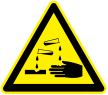

In [ ]:
SVG('https://dev.w3.org/SVG/tools/svgweb/samples/svg-files/acid.svg')

Соответствующий вывод в ячейке:
```json
"outputs": [
 {
  "data": {
   "image/svg+xml": [
    "<svg xmlns=\"http://www.w3.org/2000/svg\" viewBox=\"0 0 108 95\">\n",
        ...SVG код опущен для краткости...
    "</svg>"
   ],
   "text/plain": [
    "<IPython.core.display.SVG object>"
   ]
  },
  "output_type": "execute_result"
 }
]
```

К сожалению в случае более сложных, динамических объектов, ситуация обстоит гораздо хуже. Так, динамическое содержимое, такое как виждеты и интерактивные графики обычно представлены в виде кода как внутри ядра Jupyter Notebook, так и внутри фронтенда (встраивание на стороне фронтенда происходит также, как и в разобранных выше способах за счёт вывода и исполнения данных с MIME-типом `application/...`). При этом обновление их внешнего вида не всегда представлено изменением самого `.ipynb` файла. Вместо этого может изменяться сама DOM-структура web-страницы отображающей `.ipynb` файл. Это означает, что после завершения работы ядра или после перезагрузки страницы **состояние виджетов может быть потеряно** и они не смогут быть отрендерены заного. Это приведёт к тому, что, например, **интерактивный график не будет отображаться в выводе** соответствующей ячейки. Разработчики виджетов и Jupyter Notebook предложили [несколько](https://ipywidgets.readthedocs.io/en/stable/embedding.html#save-notebook-widget-state) [способов](https://github.com/matplotlib/ipympl/pull/343) решения этой проблемы, но на данный момент **динамический контент желательно использовать только для локальной визуализации**.

### [Бэкенды matplotlib](https://matplotlib.org/stable/users/explain/backends.html)

Теперь рассмотрим как в схему отображения контента в Jupyter ноутбуке встроена библеотека `matplotlib`.

Для выполнения отрисовки в библиотеке matplotlib выделена отдельная сущность — **backend**. Это часть програмного кода, которая выполняет отрисовку фигуры, то есть преобразование из програмного описания изображения (за что отвечает Ваш, пользовательский код — **frontend**, не путать с фронтендом среды исполнения Jupyter ноутбука) в само изображение. Вариантов выполнения такого преобразования много, но в контексте Jupyter Notebook нас будет интересовать следующие варианты (то есть разные бэкенды):
1. **inline**
2. **notebook** (эквивалентное название **nbagg**)
3. **ipympl** (эквивалентное название **widget**)

Переключение между бэкендами происходит с помощью магической команды:
```python
%matplotlib название_бэкенда
```

* **[inline](https://github.com/ipython/matplotlib-inline)**

    Один из самых популярных бекэндов. Его основной особенностью является встраивание **статических** изображений внутрь кода Jupyter Notebook. Это означает, что **изображения** отображённые с помощью этого бекэнда будут сохранены в самом `.ipynb` файле в виде содержимого с MIME типом `image/png` и, как следствие, **будут корректно отображатся после того как ядро ноутбука завершит работу**.

    Данный бекэнд желательно использовать по умолчанию, если не требуются динамические графики.

    Для управления данным бекэндом существует библиотека `matplotlib-inline`, которая, например, позволяет задавать формат встраиваемого изображения:
    ```python
    # Включение inline бекэнда
    %matplotlib inline

    import matplotlib_inline
    # Установка векторного формата для изображений
    matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
    # Установка растрового формата для изображений
    matplotlib_inline.backend_inline.set_matplotlib_formats('jpeg')
    ```
    
    Вид вывода для этого бэкенда — статический документ-изображение:
    ```json
    "outputs": [
    {
     "data": {
      "image/png": "BASE64 код изображения опущен\n",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "output_type": "display_data"
    }
    ]
    ```
    
* **notebook**

    Первая реализация интерактивных графиков в Jupyter Notebook. Однако она не поддерживается JupyterLab и в облачных средах Google Colab и Kaggle. Для того, чтобы решить проблему с потерей состояния интерактивного виждета при отключении ядра данный бэкенд добавляет в вывод ячейки помимо объекта с MIME типом `application/javascript` (для собственно реализации интерактивного содержания) ещё и саму картинку в виде html кода с MIME типом `text/html`. Таким образом даже после перезагрузки изображения будут корректно отображаться. При этом, данный бэкенд автоматически обновляет содержимое статической картинки, при выполнении изменений на динамическом графике.
    
    Вид вывода для этого бэкенда — динамический виджет и статический документ-изображение:
    ```json
    "outputs": [
     {
      "data": {
       "application/javascript": [
           JavaScript код для динамического обновления графика
       ],
       "text/plain": [
        "<IPython.core.display.Javascript object>"
       ]
      },
      "output_type": "display_data"
     },
     {
      "data": {
       "text/html": [
        "<img src=\"data:image/png;base64, BASE64 код изображения опущен" width=\"400\">"
       ],
       "text/plain": [
        "<IPython.core.display.HTML object>"
       ]
      },
      "output_type": "display_data"
     }
    ]

    ```
    
* **[ipympl](https://github.com/matplotlib/ipympl)**

    Современная реализация интерактивных графиков в Jupyter Notebook. Данная реализация бэкенда работает как локально в Jupyter Notebook/JupyterLab, так и в облачной среде Kaggle (~работа в Google Colab всё ещё не поддерживается~).
    
    Вид вывода для этого бэкенда:
    
    ```json
    "outputs": [
     {
      "data": {
       "application/vnd.jupyter.widget-view+json": {
        "model_id": "cd25c4b2fb384688af7c5433d1b4820b",
        "version_major": 2,
        "version_minor": 0
       },
       "image/png": "BASE64 код изображения опущен",
       "text/html": [
        "\n",
        "            <div style=\"display: inline-block;\">\n",
        "                <div class=\"jupyter-widgets widget-label\" style=\"text-align: center;\">\n",
        "                    Figure\n",
        "                </div>\n",
        "                <img src='data:image/png;base64, BASE64 код изображения опущен' width=640.0/>\n",
        "            </div>\n",
        "        "
       ],
       "text/plain": [
        "Canvas(toolbar=Toolbar(toolitems=[…"
       ]
      },
      "output_type": "display_data"
     }
    ]
    ```
    
    Эта имплементация активно развивается, однако у неё есть несколько особенностей:
    
    1. Начиная с версии *0.8.0* данная реализация сохраняет в выводе ячейки статическое изображение (через MIME типы `image/png` и `text/html`, как показано выше), что гарантирует сохранение результата при перезагрузке ноутбука и выключении ядра.
    2. Статическая картинка, в отличии от предыдущего случая сохраняется единожды, только при выполнении ячейки. То есть несмотря на то, что график может меняться, после перезапуска ядра визуализация будет совпадать с той, что была при выполнении ячейки. Данное поведение [может поменяться](https://github.com/matplotlib/ipympl/issues/359).
    3. **Kaggle** работает с ipympl версиями ниже *0.7.1*, что означает, что при экспорте ноутбука из этого окружения **никакие интерактивные графики не сохранятся**.
    4. Бэкенд особым образом модифицирует фигуры `matplotlib.figure.Figure`, добавляя поле `canvas`, которое являтся виджетом. Представление этого виджета с MIME типом `application/vnd.jupyter.widget-view+json` также добавляется в вывод ячейки.

### Виджеты Jupyter Notebook

Виджеты в Jupyter Notebook — это расширение, которое позворяет создавать особые динамические элементы и встраивать их в вывод ячейки. Рассмотрим создание виджета на примере:

In [ ]:
from ipywidgets import IntSlider

IntSlider()

IntSlider(value=0)

Вывод ячейки выше представлен ниже:
```json
"outputs": [
 {
  "data": {
   "application/vnd.jupyter.widget-view+json": {
    "model_id": "b682627a7c694b9484bde814a4fe973f",
    "version_major": 2,
    "version_minor": 0
   },
   "text/plain": [
    "IntSlider(value=0)"
   ]
  },
  "output_type": "execute_result"
 }
]
```

Можно заметить, что помимо текстового представления `text/plain`, создаётся представление в виде особого типа `application/vnd.jupyter.widget-view+json`. Это внутрений тип, указывающий, что данное поле в выводе является "заглушкой" для содержимого виждета. При этом, за его встраивание в web-страницу отвечает сама библиотека `ipywidgets`, а если быть точнее её фронтенд часть, запущенная в браузере. Информация о состоянии виджета не сохраняется в `.ipynb` ноутбуке, а хранится в ядре Jupyter ноутбука и в JavaScript фронтенде библиотеки `ipywidgets`. Это означает, что **при выключении ядра состояние виджета будет безвозвратно утеряно и информации для его отображения не будет**.

### Примеры работы с виджетами

Рассмотрим простейший пример использования **виджетов jupyter notebook** на примере подбора гиперпараметров полиномиальной линейной регрессии.

In [ ]:
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, interact_manual, IntSlider, FloatLogSlider, FloatSlider

import seaborn as sns

#### Пример 1

Сгенерируем обучающую выборку:

In [ ]:
x, y = (
    np.linspace(-4, 3, 100),
    np.sin(np.linspace(-4, 3, 100)) + np.random.normal(loc=0.0, scale=0.5, size=100)
)

Переключим режим работы matplotlib в интерактивный режим:

In [ ]:
%%capture
! pip install ipympl matplotlib_inline

In [ ]:
%matplotlib ipympl

# Для работы в Google Colab нужно выполнить специфичную магию
# Обычно, она не срабатывает с первого раза, поэтому может потребоваться
#   несколько раз выполнить ячейку и несколько раз попробовать нарисовать график
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    pass

Нарисуем на графике обучающую выборку:

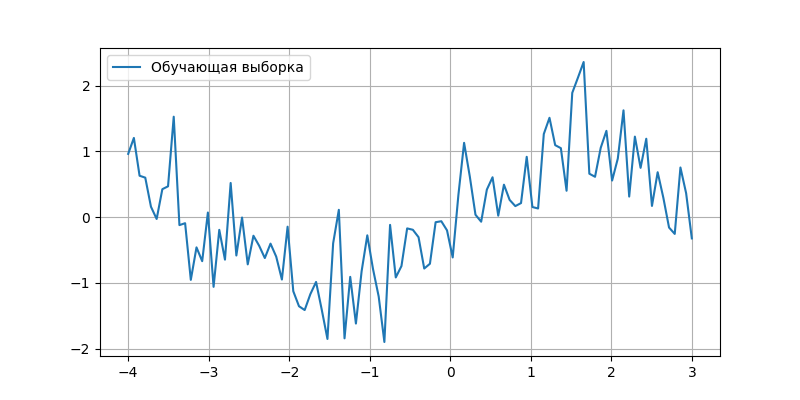

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, y, label='Обучающая выборка')
ax.grid(True)
ax.legend()
plt.show()

Так как график нариисован с помощью интерактивного бэкенда, то его можно модифицировать на лету:

In [ ]:
line, = ax.plot([], [], label='Предсказания модели')
_ = ax.legend()

# Попробуйте вызвать здесь plt.show(), а затем изменить размер графика. Подумайте, как можно объяснить наблюдаемое поведение.

Теперь создадим функцию, которая по данным и гиперпараметрам обучит модель, выполнит предсказания и нарисует их на графике:

In [ ]:
def polynomial_regression_updater(fig, line, x, y, degree, alpha):
    # Обучаем линейную модель с заданной степенью полинома и выполняем предсказания
    x_featues = PolynomialFeatures(degree=degree).fit_transform(x.reshape(-1, 1))
    model = Ridge(alpha=alpha, solver='lsqr').fit(x_featues, y)
    predictions = model.predict(x_featues)

    # Обновляем линию на графике
    line.set_xdata(x)
    line.set_ydata(predictions)
    # Принудительно перерисовываем фигуру
    fig.canvas.draw_idle()

Попробуем её вызвать и посмотреть на результат:

In [ ]:
polynomial_regression_updater(fig, line, x, y, degree=2, alpha=1.0)

Теперь данную функцию можно использовать как **callback** для использования с динамическими слайдерами для подбора гиперпараметров. `interactive_plot` — виджет, отрисовка которого позволяет использовать динамический контент:

In [ ]:
interactive_plot = interactive(
    polynomial_regression_updater, fig=fixed(fig), line=fixed(line), x=fixed(x), y=fixed(y),
    degree=IntSlider(value=4, min=1, max=20, step=1, description='degree'),
    alpha=FloatLogSlider(value=0.1, min=-3, max=4, step=0.1, description=r'$\alpha$')
)
interactive_plot

interactive(children=(IntSlider(value=4, description='degree', max=20, min=1), FloatLogSlider(value=0.1, descr…

#### Пример 2

Бывают случаи, когда невозможно обновить данные прямо на графике и может потребоваться перерисовать график с нуля внутри callback:

interactive(children=(FloatSlider(value=1.0, description='$\\alpha$', max=10.0, min=1e-05), FloatSlider(value=…

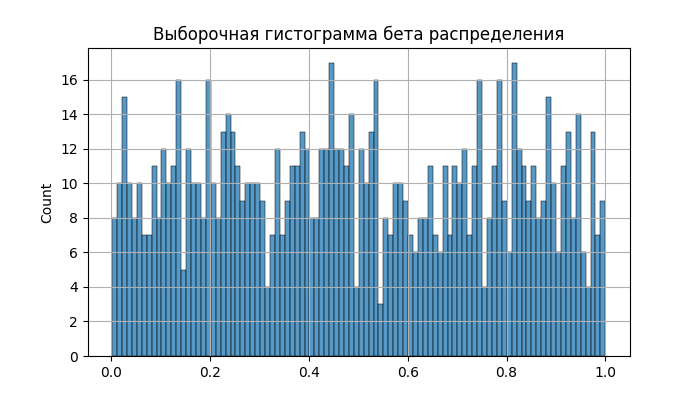

In [ ]:
def beta_distribution_updater(a, b):
    # Каждый раз при вызове функции мы можем создать новую фигуру.
    #  Однако, это в целом трудоёмкая операция (особенно в интерактивном режиме).
    #  Чтобы уменьшить накладные расходы можно отчищать оси и рисовать на них изображение заного
    # Более того, судя по всему пересоздание фигуры ломает сохранение графиков
    #  при использовании ipympl бэкенда совместно с функцией interactive
    if not hasattr(beta_distribution_updater, 'prev_fig'):
        (
            beta_distribution_updater.prev_fig,
            beta_distribution_updater.prev_ax
        ) = plt.subplots(1, 1, figsize=(7, 4))

    if beta_distribution_updater.prev_fig is not None:
        beta_distribution_updater.prev_ax.clear()

    fig, ax = beta_distribution_updater.prev_fig, beta_distribution_updater.prev_ax
    sns.histplot(np.random.beta(a=a, b=b, size=1000), ax=ax, bins=100)
    ax.set_title('Выборочная гистограмма бета распределения')
    ax.grid(True)
    fig.canvas.draw_idle()

interactive_plot = interactive(
    beta_distribution_updater,
    a=FloatSlider(value=1.0, min=1e-5, max=10, step=0.1, description=r'$\alpha$'),
    b=FloatSlider(value=1.0, min=1e-5, max=10, step=0.1, description=r'$\beta$')
)
interactive_plot

#### Пример 3

Заметим, что полную перерисовку с использованием виджетов можно проводить даже в неинтерактивном режиме:

In [ ]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In [ ]:
def normal_distribution_updater(loc, scale):
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    sns.histplot(np.random.normal(loc=loc, scale=scale, size=1000), ax=ax, bins=100)
    ax.set_title('Выборочная гистограмма номального распределения $\mathcal{N}(\mu, \sigma)$')
    ax.grid(True)
    plt.show()

interactive_plot = interactive(
    normal_distribution_updater,
    loc=FloatSlider(value=0.0, min=-4, max=4, step=0.1, description=r'$\mu$'),
    scale=FloatSlider(value=1.0, min=1e-5, max=10, step=0.1, description=r'$\sigma$')
)
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='$\\mu$', max=4.0, min=-4.0), FloatSlider(value=1.0, …

У функции `interactive` есть значительный недостаток. Посмотрим на вывод предыдущей ячейки:
```json
"outputs": [
 {
  "data": {
   "application/vnd.jupyter.widget-view+json": {
    "model_id": "f970fe3c94ed45dd8138174da375ca77",
    "version_major": 2,
    "version_minor": 0
   },
   "text/plain": [
    "interactive(children=(FloatSlider(value=0.0, description='$\\\\mu$', max=4.0, min=-4.0), FloatSlider(value=1.0, …"
   ]
  },
  "output_type": "execute_result"
 }
```

Видно, что в выводе присутсвует только один виджет. Это связано с тем, что функция `interact` перехватывает все попытки записи в вывод ячейки из функции-callback и оборачивает их в один цельный виджет. Таким образом **вся информация о выводе храниться только внутри состояния виджета и будет безвозвратно потеряна в момент отключения ядра ноутбука**. Таким образом даже с учётом того, что inline matplotlib бэкенд попытался записать статическое изображение внутрь `.ipynb` файла, чтобы предотвратить его потерю, функция `interact` помешала этому.

### Общий итог

Рассмотрим основные use-cases:

1. **Google Colab** в последней версии начал поддерживать динамический контент! Можно использовать как ipympl, так и inline окружения. Экспорт (скачивание ноутбука) сохраняет динамические графики (Примеры 1, 2), однако, как было сказано выше, график сохраняется на момент его первой отрисоки.
1. **Kaggle** в последней версии начал поддерживать динамический контент! Можно использовать как ipympl, так и inline окружения, но в обоих случаях динамические графики также не получится экспортировать (с бэкендом ipympl из-за слишком старой версии библиотеки в Kaggle, а с бэкендом inline из-за особенностей реализации библиотеки ipywidgets, описанных выше)
2. Если Jupyter Notebook **запущен локально**, то Вам доступны все три бэкенда:
    * При использовании ipympl графики должны всегда правильно сохраняться (обратите внимание на комментарий в функции `beta_distribution_updater`), однако из содержимое будет соответствовать результату, полученному при первом запуске ячейки
    * При использовании inline, динамически обновляемые графики (Пример 3) не получится сохранить после выключения ядра
    * Использовать бэкенд notebook не рекомендуется, так как он нестабильно работает с библиотекой ipywidgets

**Обратите внимание, что динамическое содержимое может некорректно сохраняться в jupyter notebook. Используйте его только для локальной визуализации. Все графики, необходимые для сдачи задания должны быть статическими. Переход в статический режим происходит с помощью магической команды `%matplotlib inline`.**

**Обязательно убедитесь, что все графики корректно сохранились корректно в ноутбуке перед сдачей в систему.**